# Good Reads Capstone 

# TBE: insert Big Picture of a Book

# Part 1: Webscraping

Link: https://www.goodreads.com/shelf/show/currently-reading?page=1

TBE: Insert a screen cap of Good Reads with what I scraped

In [1]:
#Python Libraries for WebScraping
import requests
from bs4 import BeautifulSoup

In [2]:
gr_webpage = requests.get('https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1')
soup = BeautifulSoup(gr_webpage.text, 'html.parser')

In [3]:
num = 20 #Set as any number 1~50
book_obj = soup.findAll('a',class_='bookTitle')[num].text
data_title = str(book_obj).split("(")[0].strip()
print(data_title)

Divergent


# Part 2: Database Storage

In [4]:
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient
import pandas as pd


In [5]:
client = MongoClient()
database = client['demonstration']   # Database name (to connect to)
collections = database['gr_demo'] 
try:
    collections.delete_many({})
except:
    pass
collections = database['gr_demo'] # Collection name (to use)

In [6]:
for obj in soup.findAll('tr',itemtype='http://schema.org/Book')[num:num+5]:
    book_obj = obj.find('a',class_='bookTitle')
    book_title = obj.find('a',class_='bookTitle').text
    data_title = str(book_title).split("(")[0].strip()
    print(data_title)

    book_ratings = obj.find('span',class_='stars staticStars')
    rating = ""
    for char in book_ratings.next_siblings:
        if char.name == "span":
            break
        else:
            rating = char
    book_rating_avg_num = rating.strip().split("—")
    data_avg_rating = float(book_rating_avg_num[0].strip().split()[0])
    
    link_book = "https://www.goodreads.com" + book_obj["href"]
    book_sub_page = requests.get(link_book)
    book_sub_soup = BeautifulSoup(book_sub_page.text, 'html.parser')
    book_genre = book_sub_soup.find("a", class_ = "actionLinkLite bookPageGenreLink")
    data_book_genre = book_genre.text.strip()

    author_names = obj.find_all('span',itemprop='name')[1]
    data_author = author_names.text.strip()
    collections.insert_one({"title" : data_title,"author" : data_author, "genre": data_book_genre, "average_rating": data_avg_rating})                     


Divergent
Romeo and Juliet
Lord of the Flies
The Alchemist
Crime and Punishment


In [7]:
demo_data = pd.DataFrame(list(collections.find()))
demo_data = demo_data[["title", "author", "genre", "average_rating"]]
demo_data.head()

,title,author,genre,average_rating
0,Divergent,Veronica Roth,Young Adult,4.21
1,Romeo and Juliet,William Shakespeare,Classics,3.74
2,Lord of the Flies,William Golding,Classics,3.66
3,The Alchemist,Paulo Coelho,Fiction,3.85
4,Crime and Punishment,Fyodor Dostoyevsky,Classics,4.20


# Part 3: Exploratory Data Analysis

In [8]:
#Python Libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt

# Exploring the Data

In [9]:
client = MongoClient()
db = client.capstone_1_db
collection = db.good_reads_best_books
data = pd.DataFrame(list(collection.find())).set_index("title")[["author", "birth_country" , "genre", "book_year", "votes", "average_rating" , "number_of_ratings"]]


In [10]:
data.head()

,author,birth_country,genre,book_year,votes,average_rating,number_of_ratings
title,,,,,,,
The Hunger Games,Suzanne Collins,United States,Young Adult,2008,29045,4.33,5631195
Harry Potter and the Order of the Phoenix,J.K. Rowling,United Kingdom,Fantasy,2003,25353,4.48,2097103
To Kill a Mockingbird,Harper Lee,United States,Classics,1960,21592,4.27,3835463
Pride and Prejudice,Jane Austen,England,Classics,1813,18665,4.25,2515019
Twilight,Stephenie Meyer,United States,Young Adult,2005,14517,3.58,4355192


In [11]:
data.tail()

,author,birth_country,genre,book_year,votes,average_rating,number_of_ratings
title,,,,,,,
Empire Falls,Richard Russo,United States,Fiction,2001,80,3.92,100002
We Have Always Lived in the Castle,Shirley Jackson,United States,Horror,1962,70,4.02,78882
The Tale of Genji,Murasaki Shikibu,Japan,Classics,1008,75,3.71,8930
Fallen Too Far,Abbi Glines,Alabama,Romance,2012,65,4.20,151079
Till We Have Faces,C.S. Lewis,Ireland,Fiction,1956,67,4.19,45052


In [12]:
grouped_data_country = data.groupby(by= "birth_country")[["birth_country","votes"]].sum()
sorted_data_country = grouped_data_country.sort_values("votes", ascending = False)

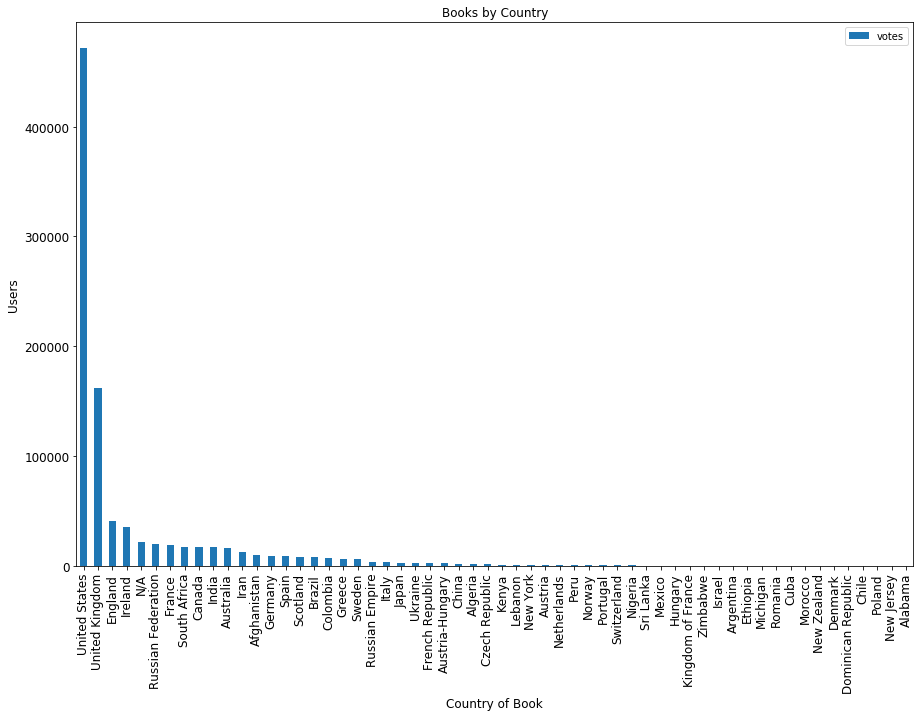

In [13]:
ax = sorted_data_country.plot(kind='bar', title ="Books by Country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Country of Book", fontsize=12)
ax.set_ylabel("Users", fontsize=12)
# for i, v in enumerate(list(sorted_data_country["votes"])):
#     ax.text(x= i - 0.35, y = v, s = str(v), color='black')
plt.show()

In [14]:
data_split = data[["book_year", "votes"]].sum()
grouped_data_year = data.groupby(by= "book_year")[["votes"]].sum()

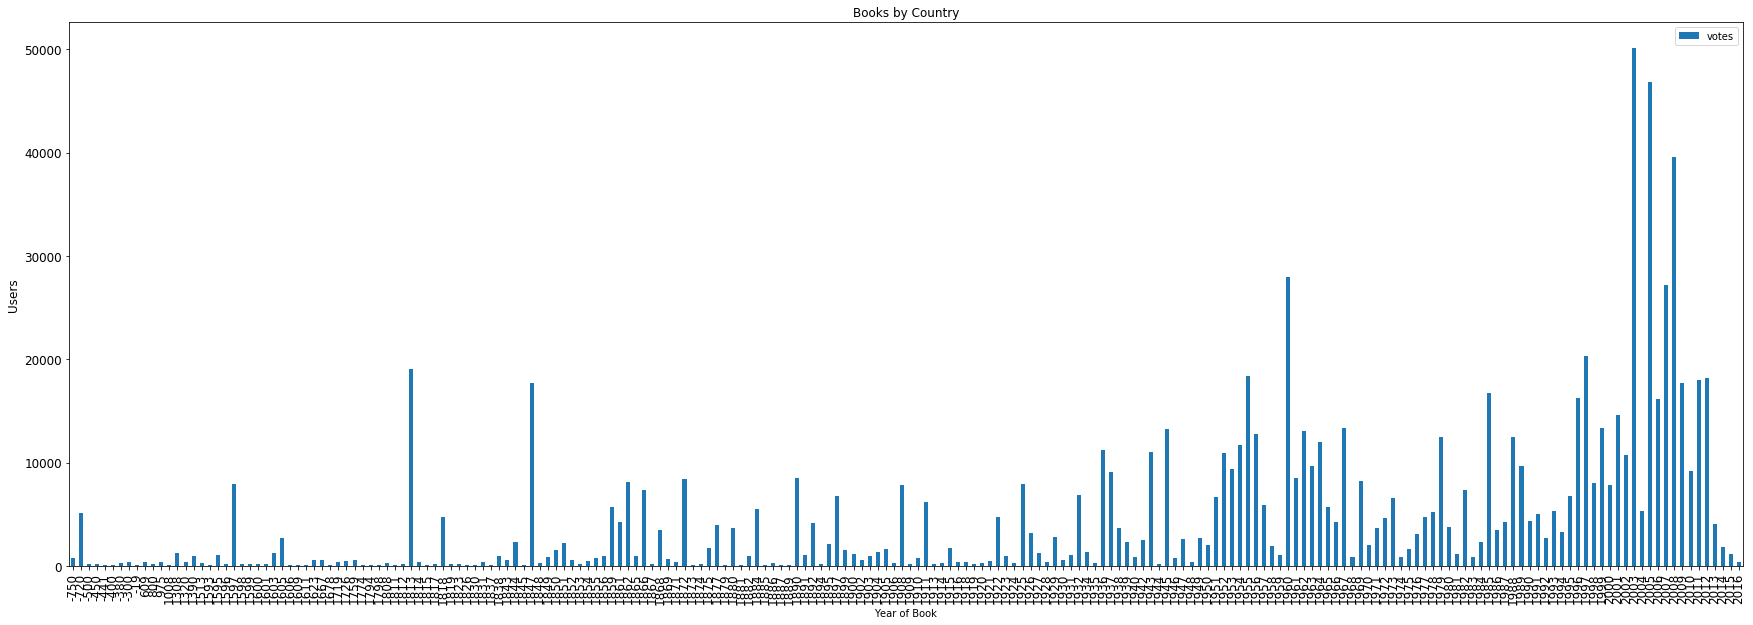

In [15]:
ax = grouped_data_year.plot(kind='bar', title ="Books by Country", figsize=(30, 10), legend=True, fontsize=12)
ax.set_xlabel("Year of Book", fontsize=10)
ax.set_ylabel("Users", fontsize=12)
# for i, v in enumerate(list(sorted_data["current_readers"])):
#     ax.text(x= i - 0.35, y = v, s = str(v), color='black')
plt.show()

In [16]:
data_split = data[["book_year", "votes"]].sum()
grouped_data_year = data.groupby(by= "book_year")[["votes"]].sum()
sorted_data_year = grouped_data_year.sort_values("votes", ascending = False)[:20]

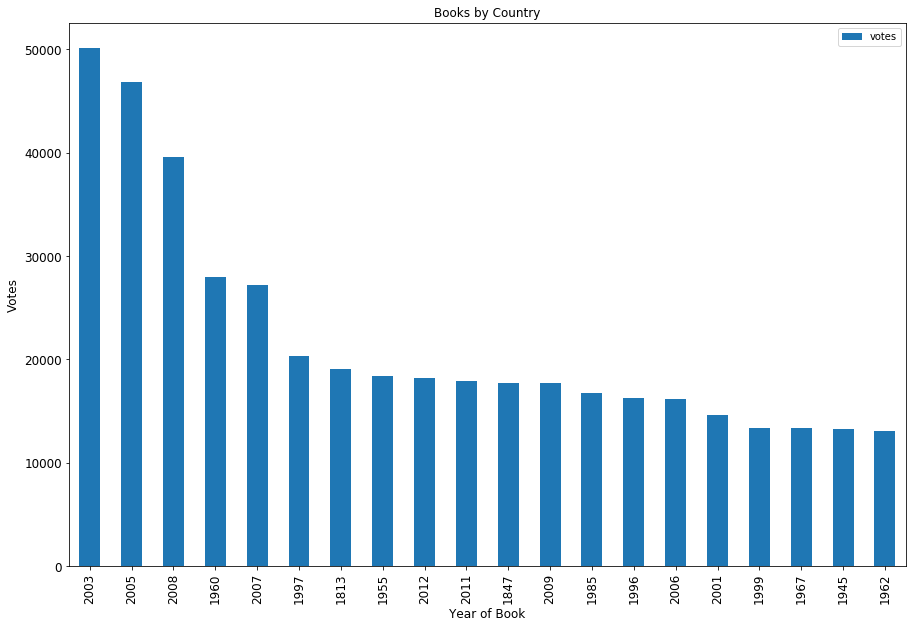

In [17]:
ax = sorted_data_year.plot(kind='bar', title ="Books by Country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year of Book", fontsize=12)
ax.set_ylabel("Votes", fontsize=12)
# for i, v in enumerate(list(sorted_data_year["current_readers"])):
#     ax.text(x= i - 0.35, y = v, s = str(v), color='black')
plt.show()

# Demographics of Goodreaders

In [18]:
demographics = pd.read_csv("./goodreads_demographics.csv", delimiter = ";")[["count", "name"]]
sliced_demographics = demographics.sort_values("count", ascending = False)[:15].set_index('name')

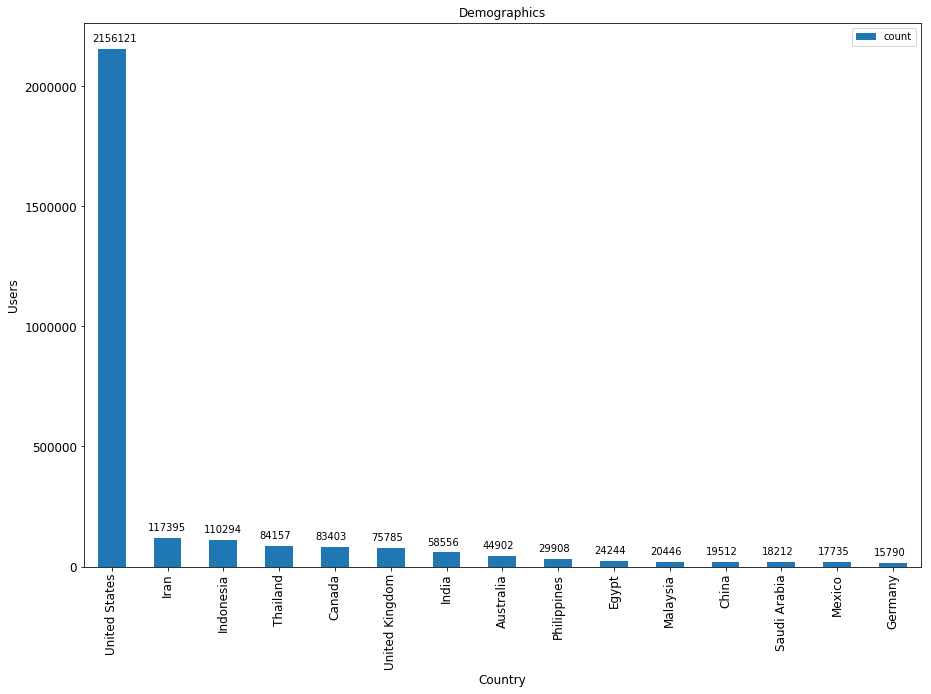

In [19]:
ax = sliced_demographics.plot(kind='bar', title ="Demographics", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Users", fontsize=12)
for i, v in enumerate(list(sliced_demographics["count"])):
    ax.text(x= i - 0.35, y = v + 30000, s = str(v), color='black')
plt.show()